# BMI/CS 576 - HW6
The objectives of this homework are to better understand

* the statistical dependencies represented by a Bayesian network
* alternative representations of conditional probability distributions (CPDs)
* how model evidence works as a score for Bayesian networks
* the Sparse Candidate algorithm

## HW policies
Before starting this homework, please read over the [homework policies](https://canvas.wisc.edu/courses/167969/pages/hw-policies) for this course.  In particular, note that homeworks are to be completed *individually*.

You are welcome to use any code from the weekly notebooks in your solutions to the HW.

## PROBLEM 1 (30 POINTS)

Consider the Bayesian network below 

![simple_network](simple_network.png)

**(a)** Give a table specifying the joint probability distribution, $P(A, B, C)$ represented by the Bayesian network.

**(b)** Given your table from (a), compute $P(A = true\ |\ C = true)$

**(c)** Given your table from (a), compute $P(A = true\ |\ B = true)$

**(d)** Given your table from (a), compute $P(A = true\ |\ B = true, C = true)$

**(e)** Given your table from (a), is $A$ independent of $B$? Justify your answer.
  
**(f)** Given your table from (a), is $A$ independent of $B$ given $C$? Justify your answer.



### BEGIN SOLUTION TEMPLATE=solution to problem 1

**(a)** $P(a, b, c) = P(a) P(b) P(c|a,b)$

| A | B | C | P(A, B, C)|
|---|---|---|-----------|
| T | T | T |    0.2    |
| T | T | F |    0.0    |
| T | F | T |    0.2    |
| T | F | F |    0.0    |
| F | T | T |    0.3    |
| F | T | F |    0.0    |
| F | F | T |    0.0    |
| F | F | F |    0.3    |

**(b)**
$P(A = true\ |\ C = true) = \frac{P(A = true, C = true)}{P(C = true)}
= \frac{0.2 + 0.2}{0.2 + 0.2 + 0.3 + 0} = \frac{4}{7} \approx 0.571$

**(c)**
$P(A = true\ |\ B = true) = \frac{P(A = true, B = true)}{P(B = true)}
= \frac{0.2 + 0}{0.2 + 0 + 0.3 + 0} = \frac{2}{5} = 0.4$

**(d)** 
$P(A = true\ |\ B = true, C = true) = \frac{P(A = true, B = true, C = true)}{P(B = true, C = true)}
= \frac{0.2}{0.2 + 0.3} = \frac{2}{5} = 0.4$

**(e)**

$P(A = true) = 0.2 + 0 + 0.2 + 0 = 0.4$ 

$P(A = true | B = false) = \frac{P(A = true, B = false)}{P(B = false)}
= \frac{0.2 + 0}{0.2 + 0 + 0 + 0.3} = \frac{2}{5} = 0.4$

Combined with the result from (c) we can see that $P(A) = P(A | B)$, for all values of $A$ and $B$, and thus that $A$ is independent of $B$.

**(f)**
We can see from (b) and (d) that $P(A = true\ |\ C = true) \neq P(A = true\ |\ B = true, C = true)$, and thus that $A$ is *not* independent of $B$ given $C$.


### END SOLUTION

## PROBLEM 2 (25 POINTS)
As shown in the slide "Representing CPDs for Discrete Variables" (slide 8) of the lecture "Networks - Introduction to Bayesian Networks" some conditional probability distributions (CPD) can also be represented with a tree.

**(a)** Give the CPD table for the distribution $P(D\ |\ A,B,C)$ represented by the tree below.
![](decision_tree.png)

**(b)** Give the most compact tree (i.e., one with the fewest nodes) represention of the distribution $P(D\ |\ A,B,C)$ specified by the CPD table below.

![](decision_tree_cpd.png)

**(c)** Suppose that you know that the CPD $P(D\ |\ A,B,C)$ can be represented by the tree structure of part (a), but that you don't know the parameters at the leaves of the tree.  Now suppose you are given some training data with which to estimate the CPD.  What is the major advantage of the tree representation over the CPD table representation in estimating the parameters of the CPD?

### BEGIN SOLUTION TEMPLATE=solution to problem 2

**(a)**
$P(D| A, B, C)$

| A | B | C |  T  |  F  |
|---|---|---|-----------|
| T | T | T | 0.5 | 0.5 |
| T | T | F | 0.4 | 0.6 |
| T | F | T | 0.5 | 0.5 |
| T | F | F | 0.4 | 0.6 |
| F | T | T | 0.7 | 0.3 |
| F | T | F | 0.7 | 0.3 |
| F | F | T | 0.8 | 0.2 |
| F | F | F | 0.8 | 0.2 |

**(b)** ![p2_decision_tree](p2_decision_tree.png)

**(c)** The tree representation has only four free parameters compared to the eight free parameters of the CPD representation. With fewer parameters, and with the same amount of training data, the estimates for the tree structure representation will be more accurate.

### END SOLUTION

## PROBLEM 3 (30 POINTS)

Consider two possible Bayesian networks for two binary random variables, $X_1$ and $X_2$, shown below.

![](two_var_networks.png)

**(a)** Give the likelihood function, $P(D|G_0, \theta)$, for network $G_0$ in terms of the count variables shown in the table above.

**(b)** Give the likelihood function, $P(D|G_1, \theta)$, for network $G_1$ in terms of the count variables shown in the table above.

**(c)** Suppose that we estimate maximum likelihood values, $\hat{\theta}_{MLE}$, for the parameters of each of the two networks given a data set, $D$.  Show that $P(D|G_1, \hat{\theta}_{MLE}) \geq P(D|G_0, \hat{\theta}_{MLE})$ for any data set, $D$, and thus that the likelihood is not a good way to score networks. *Hint: consider what happens when $\theta_2 = \theta_{20} = \theta_{21}$.*

**(d)** Derive the model evidence, $P(D|G_0)$ for the network $G_0$ in terms of the count variables shown in the table above.

**(e)** Derive the model evidence, $P(D|G_1)$ for the network $G_1$ in terms of the count variables shown in the table above.

**(f)** Consider the case in which $n = 20$ and $n_{0-} = n_{1-} = n_{-0} = n_{-1} = 10$ (i.e., each row and column of the data table sum to half of the total observations).  Compute the difference in the log model evidence between the two models, $\log(P(D|G_1)) - \log(P(D|G_0))$, over all possible values of $n_{00}$ (note that specifying $n_{00}$ specifies all other counts).  These values indicate for which data sets we would prefer $G_1$ over $G_0$, and vice versa.  Show your results as a plot of $\log(P(D|G_1)) - \log(P(D|G_0))$ vs. $n_{00}$.

### BEGIN SOLUTION TEMPLATE=solution to problem 3

**(a)** $P(D|G_0, \theta) = 
\theta_1^{n_{0-}} (1 - \theta_1)^{n_{1-}}
\theta_2^{n_{-0}} (1 - \theta_2)^{n_{-1}}$

**(b)** $P(D|G_1, \theta) = 
\theta_1^{n_{0-}} (1 - \theta_1)^{n_{1-}} 
\theta_{20}^{n_{00}} (1 - \theta_{20})^{n_{01}}
\theta_{21}^{n_{10}} (1 - \theta_{21})^{n_{11}}$

**(c)** Suppose that for a given data set, $D$, that $\hat{\theta}^0$ are the maximum likelihood parameters for $G_0$.  Define a set of parameters, $\tilde{\theta}^1$, for $G_1$, in terms of $\hat{\theta}^0$, with $\tilde{\theta}^1_1 = \hat{\theta}^0_{1}$ and $\tilde{\theta}^1_{20} = \tilde{\theta}^1_{21} = \hat{\theta}^0_{2}$.  Note that $P(D|G_1, \tilde{\theta}^1) = P(D|G_0, \hat{\theta}^0)$.  However, note that $\tilde{\theta}^1$ are not necessarily the maximum likelihood parameters, $\hat{\theta}^1$, for $G_1$.  Since maximum likelihood parameter estimates maximize the likelihood function, $P(D|G_1, \hat{\theta}^1) \geq P(D|G_1, \tilde{\theta}^1) = P(D|G_0, \hat{\theta}^0)$.  Thus, $P(D|G_1, \hat{\theta}^1) \geq P(D|G_0, \hat{\theta}^0)$.

**(d)** $P(D|G_0) = -\left(2\log(n+1) + \log {n \choose n_{0-}} + \log {n \choose n_{-0}}\right)$

**(e)** $P(D|G_1) = -\left(\log(n+1) + \log {n \choose n_{0-}} + 
\log(n_{0-} + 1) + \log {n_{0-} \choose n_{00}} +
\log(n_{1-} + 1) + \log {n_{1-} \choose n_{10}} \right)$

**(f)** See code and plot below.  $G_0$ is preferred over $G_1$ for $n_{00} \in [4,6]$, for which the estimated probability of $X_2$ given $X_1 = 0$ is roughly the same as the probability of $X_2$ given $X_1 = 1$


### END SOLUTION

In [1]:
import math
import matplotlib.pyplot as plt

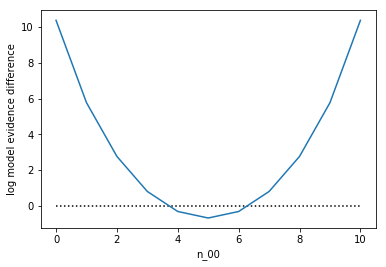

In [2]:
### BEGIN SOLUTION
def logbinom(n, k):
    """The natural logarithm of the binomial coefficient (n choose k)"""
    return math.lgamma(n + 1) - math.lgamma(k + 1) - math.lgamma(n - k + 1)

def matrix(nrows, ncols, val=None):
    return [[val] * ncols for _ in range(nrows)]

def model_evidence_g0(n00, n01, n10, n11):
    n0_ = n00 + n01
    n_0 = n00 + n10
    n = n00 + n01 + n10 + n11
    return -(math.log(n + 1) + 
             logbinom(n, n0_) + 
             math.log(n + 1) + 
             logbinom(n, n_0))

def model_evidence_g1(n00, n01, n10, n11):
    n0_ = n00 + n01
    n1_ = n10 + n11
    n = n00 + n01 + n10 + n11
    return -(math.log(n + 1) + logbinom(n, n0_) + 
             math.log(n0_ + 1) + logbinom(n0_, n00) +
             math.log(n1_ + 1) + logbinom(n1_, n10))

n = 20
half_n = n // 2
n00_vals = range(0, half_n + 1)
score_diffs = []
for n00 in n00_vals:
    n01 = half_n - n00
    n11 = n00
    n10 = n01
    score_diff = (model_evidence_g1(n00, n01, n10, n11) - 
                  model_evidence_g0(n00, n01, n10, n11))
    score_diffs.append(score_diff)

plt.plot(n00_vals, score_diffs)
plt.xlabel("n_00")
plt.ylabel("log model evidence difference")
plt.hlines(0, min(n00_vals), max(n00_vals), linestyles='dotted')
plt.show()
### END SOLUTION

## PROBLEM 4 (15 POINTS) 


Suppose we wish to reconstruct the gene regulatory network for three genes, $X$, $Y$, and $Z$, using the Bayesian network approach and the “sparse candidate” algorithm. We are given data from 100 independent experiments in which the expression levels of the three genes are measured. For simplicity, we model each gene as being either “on” (T) or “off” (F). Below is a table summarizing the number of times (count) each configuration of gene expression status was observed in these experiments.


| X | Y | Z | count |
|---|---|---|-------|
| T | T | T |  36   |
| T | T | F |   4   |
| T | F | T |   2   |
| T | F | F |   8   |
| F | T | T |   9   |
| F | T | F |   1   |
| F | F | T |   8   |
| F | F | F |  32   |


**(a)** Suppose we wish to compute a single candidate parent for $Z$. In the first round of the “sparse candidate” algorithm, we compute the mutual information between $Z$ and the other random variables. Compute the mutual information between $Z$ and $X$, $I(X,Z)$, based on the frequencies observed in the data.

**(b)** Compute the mutual information between $Z$ and $Y$, $I(Y,Z)$, based on the frequencies observed in the data.

**(c)** Based on your answers to (a) and (b), which gene would be selected as the candidate parent for Z? Briefly explain your answer.

### BEGIN SOLUTION TEMPLATE=solution to problem 4

**(a)** 

| $X$ | $Z$ | $\hat{P}(x,z)$ | $\hat{P}(x)$ | $\hat{P}(z)$ | $\hat{P}(x,z) \log\left(\frac{\hat{P}(x,z)}{\hat{P}(x)\hat{P}(z)}\right)$ |
|-----|-----|----------------|--------------|--------------|---------------------------------------------------------------------------------|
|  T  |  T  | 0.38  |  0.5 | 0.55 | 0.123  |
|  T  |  F  | 0.12  |  0.5 | 0.45 | -0.075 |
|  F  |  T  | 0.17  |  0.5 | 0.55 | -0.082 |
|  F  |  F  | 0.33  |  0.5 | 0.45 | 0.126  |


$I(X,Z) = 0.123 - 0.075 - 0.082 + 0.126 = 0.092$

(with log base 2, $I(X,Z) = 0.132$, and with log base 10, $I(X,Z) = 0.040$)

**(b)**

| $Y$ | $Z$ | $\hat{P}(y,z)$ | $\hat{P}(y)$ | $\hat{P}(z)$ | $\hat{P}(y,z) \log\left(\frac{\hat{P}(y,z)}{\hat{P}(y)\hat{P}(z)}\right)$ |
|-----|-----|----------------|--------------|--------------|---------------------------------------------------------------------------------|
|  T  |  T  | 0.45           | 0.5 | 0.55 | 0.222  |
|  T  |  F  | 0.05           | 0.5 | 0.45 | -0.075 |
|  F  |  T  | 0.10           | 0.5 | 0.55 | -0.101 |
|  F  |  F  | 0.40           | 0.5 | 0.45 | 0.230  |


$I(Y,Z) = 0.222 - 0.075 - 0.101 + 0.230 = 0.276$

(with log base 2, $I(Y,Z) = 0.397$, and with log base 10, $I(Y,Z) = 0.120$)

**(c)**
$Y$ would be selected to be the candidate parent for $Z$ because $I(Y, Z) > I(X, Z)$.

### END SOLUTION